2025-10-15 15:21:02.879301: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760541663.078018      80 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760541663.130795      80 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 8982 files belonging to 3 classes.
Using 7186 files for training.


I0000 00:00:1760541690.786457      80 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 8982 files belonging to 3 classes.
Using 1796 files for validation.
Class Names: ['mask_weared_incorrect', 'with_mask', 'without_mask']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20


I0000 00:00:1760541706.155804     137 cuda_dnn.cc:529] Loaded cuDNN version 90300


225/225 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.6398 - loss: 0.8156 - val_accuracy: 0.8331 - val_loss: 0.4305
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8140 - loss: 0.4604 - val_accuracy: 0.8504 - val_loss: 0.3845
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8313 - loss: 0.4242 - val_accuracy: 0.8657 - val_loss: 0.3411
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8501 - loss: 0.3737 - val_accuracy: 0.8636 - val_loss: 0.3400
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8457 - loss: 0.3814 - val_accuracy: 0.8837 - val_loss: 0.3123
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8540 - loss: 0.3498 - val_accuracy: 0.8837 - val_loss: 0.2976
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8653 - loss: 0.3333 - val_accuracy: 0.8899 - val_loss: 0.2815
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8698 - loss: 0.3325 - val_accurac

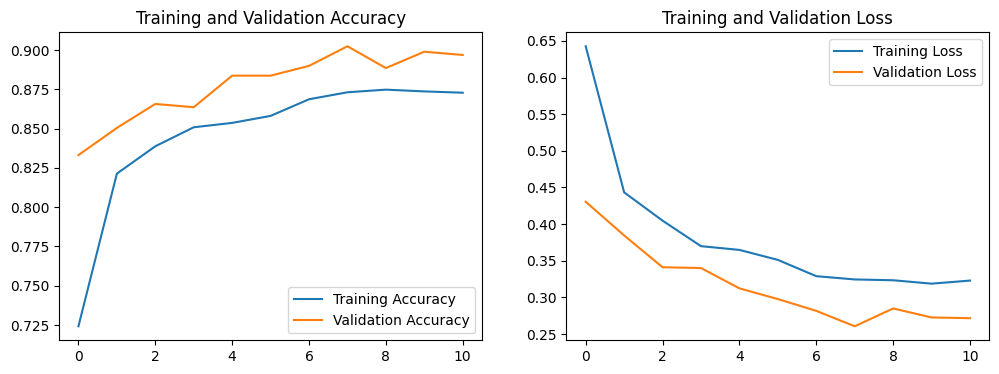

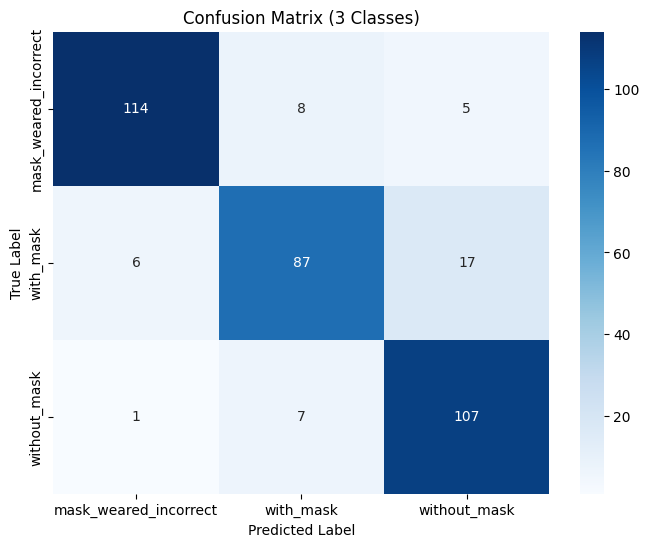


Model saved successfully as 3class_face_mask_detector.h5


In [1]:
# -----------------------------------------------------------
# 1. IMPORT LIBRARIES & SETUP PARAMETERS
# -----------------------------------------------------------
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Define key parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20 # EarlyStopping will find the best epoch

# -----------------------------------------------------------
# 2. LOAD, SPLIT, AND PREPARE THE 3-CLASS DATASET
# -----------------------------------------------------------
# ✨ CHANGE 1: UPDATE THE DATA DIRECTORY PATH ✨
data_dir = '/kaggle/input/face-mask-detection/Dataset' # Point to the correct subfolder

# Load the dataset and create an 80/20 train/validation split
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    labels='inferred',
    label_mode='categorical'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    labels='inferred',
    label_mode='categorical'
)

# Get the new class names. It will now be a list of 3 classes.
class_names = train_ds.class_names
print("Class Names:", class_names)

# Create a separate test set from the validation set
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(val_batches // 5)
val_ds = val_ds.skip(val_batches // 5)

# Optimize data loading performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# -----------------------------------------------------------
# 3. BUILD THE ROBUST TRANSFER LEARNING MODEL
# -----------------------------------------------------------
# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

# Load the pre-trained MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Create our new model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
# ✨ CHANGE 2: UPDATE THE OUTPUT LAYER FOR 3 CLASSES ✨
outputs = tf.keras.layers.Dense(3, activation='softmax')(x) # Changed from 2 to 3
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# -----------------------------------------------------------
# 4. TRAIN THE MODEL WITH EARLY STOPPING
# -----------------------------------------------------------
# Early stopping callback to prevent overfitting
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stopping_callback]
)

# -----------------------------------------------------------
# 5. EVALUATE THE MODEL
# -----------------------------------------------------------
# Plotting and confusion matrix code remains the same.
# The confusion matrix will now be a 3x3 grid, showing how the model performs on all three classes.
actual_epochs = len(history.history['loss'])
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(actual_epochs), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(actual_epochs), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(actual_epochs), history.history['loss'], label='Training Loss')
plt.plot(range(actual_epochs), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# --- Confusion Matrix on the Test Set ---
y_pred = []
y_true = []
for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (3 Classes)')
plt.show()

# -----------------------------------------------------------
# 6. SAVE THE MODEL
# -----------------------------------------------------------
model.save('3class_face_mask_detector.h5')
print("\nModel saved successfully as 3class_face_mask_detector.h5")